<a href="https://colab.research.google.com/github/TioSatrio100/Spam-Detection-Using-NLP/blob/main/SpamDetectionNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NLP PROJECT SUBMISSION**
#**First Project: Creating an NLP Model with TensorFlow**
**SATRIO BRAHMANTORO ADI SUBAGIO**

In [147]:
import pandas as pd
df = pd.read_csv('spam_ham_dataset.csv')


In [148]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [149]:
df = df.drop(columns = 'Unnamed: 0', axis = 1)
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [151]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x if not w.lower() in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [153]:
length = df['text'].str.len().max()
mail = df['text'].values
label = df['label_num'].values
mail_train, mail_test, label_train, label_test = train_test_split(mail, label, test_size=0.2)

In [155]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=length, oov_token='')
tokenizer.fit_on_texts(mail_train)
tokenizer.fit_on_texts(mail_test)

seq_train = tokenizer.texts_to_sequences(mail_train)
seq_test = tokenizer.texts_to_sequences(mail_test)

padded_train = pad_sequences(seq_train, maxlen=20)
padded_test = pad_sequences(seq_test, maxlen=20)

In [163]:

model = Sequential([
    Embedding(250, 16, input_length=20),
    LSTM(64),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(1, activation='sigmoid')
])


model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [164]:
#Callback Function
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
class accCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.90 and logs.get('val_accuracy') >= 0.90):
            print("\nAccuracy and Val_Accuracy has reached 90%!", "\nEpoch: ", epoch)
            self.model.stop_training = True

callbacks = accCallback()

auto_reduction_LR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2, #if after 2 epoch not improve reduce LR by factor
    verbose = 1,
    factor = 0.2,
    min_lr = 0.000003
)

auto_stop_learn = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0,
    patience = 4,
    verbose = 1,
    mode = 'auto'
)


In [165]:
History = model.fit(
    padded_train, label_train,
    epochs = 100,
    callbacks=[callbacks, auto_reduction_LR, auto_stop_learn],
    validation_data = (padded_test, label_test),
    verbose = 2
)

Epoch 1/100
130/130 - 7s - loss: 0.3992 - accuracy: 0.8269 - val_loss: 0.5251 - val_accuracy: 0.7285 - lr: 0.0010 - 7s/epoch - 52ms/step
Epoch 2/100
130/130 - 2s - loss: 0.2744 - accuracy: 0.9072 - val_loss: 0.4792 - val_accuracy: 0.7285 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 3/100
130/130 - 2s - loss: 0.2632 - accuracy: 0.9084 - val_loss: 0.3931 - val_accuracy: 0.7449 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 4/100
130/130 - 2s - loss: 0.2576 - accuracy: 0.9125 - val_loss: 0.2866 - val_accuracy: 0.8937 - lr: 0.0010 - 2s/epoch - 17ms/step
Epoch 5/100

Accuracy and Val_Accuracy has reached 90%! 
Epoch:  4
130/130 - 2s - loss: 0.2528 - accuracy: 0.9074 - val_loss: 0.2504 - val_accuracy: 0.9169 - lr: 0.0010 - 2s/epoch - 18ms/step


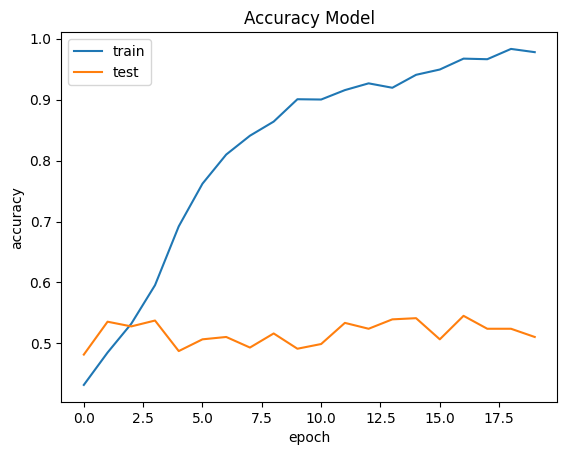

In [166]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

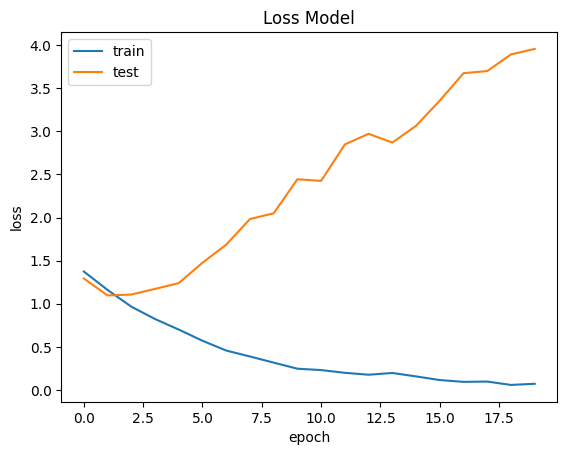

In [167]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()